In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
df = pd.read_csv('spam.csv')
df.shape

(5572, 5)

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
#data Cleaning
#EDA
#text preprocessing
#model building
#evaluation
#improvements
#website
#deployment

# 1. Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
#Renaming the Columns
df.rename({'v1':'Type','v2':'SMS'},axis=1,inplace=True)
df

,Type,SMS,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will �_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [7]:
## Removing the Last Three Columns

final_df = df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)
final_df.sample(5)

,Type,SMS
3277,ham,What happened in interview?
1631,ham,We not watching movie already. Xy wants 2 shop...
3358,spam,Sorry I missed your call let's talk when you h...
4321,ham,Sorry . I will be able to get to you. See you ...
2299,spam,Congrats! 1 year special cinema pass for 2 is ...


In [8]:
## Changing My Target to Labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
final_df['Type'] = le.fit_transform(final_df['Type'])

In [9]:
final_df.sample(5)

,Type,SMS
3741,0,Hey i'm bored... So i'm thinking of u... So wa...
277,0,"Awesome, I'll see you in a bit"
2033,0,IM GONNA MISS U SO MUCH
1769,0,Ha... Both of us doing e same thing. But i got...
4031,0,I'm very happy for you babe ! Woo hoo party on...


In [10]:
## Checking Missing Values
final_df.isnull().sum()

Type    0
SMS     0
dtype: int64

In [11]:
##Check for Duplicated Values
final_df.duplicated().sum()

403

In [12]:
##Remove Duplicates
final_df = final_df.drop_duplicates(keep='first')
final_df.head()

,Type,SMS
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
final_df.shape

(5169, 2)

In [14]:
final_df.duplicated().sum()

0

# 2. EDA

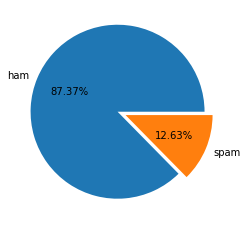

In [15]:
plt.pie(final_df['Type'].value_counts(),labels=['ham','spam'],autopct='%0.2f%%',explode=[0.1,0])
plt.show()

In [16]:
# data is imbalaced
## Now we are going to do Analysis on No. of Characters, Words, and Sentences Used in every Message

import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to C:\Users\Shivshakti
[nltk_data]     Media\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Shivshakti
[nltk_data]     Media\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
# nltk.download('punkt')

In [18]:
## Number of Characters
final_df['num_characters'] = final_df['SMS'].apply(len) 
final_df.head()

,Type,SMS,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [19]:
# x = final_df['SMS'].apply(lambda x:x.split())
# x[0]

In [20]:
## Number of Words
final_df['num_words'] = final_df['SMS'].apply(lambda x:len(nltk.word_tokenize(x)))
final_df.head()

,Type,SMS,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [21]:
final_df['num_sentences'] = final_df['SMS'].apply(lambda x:len(nltk.sent_tokenize(x)))
final_df.head()

,Type,SMS,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [22]:
##ham
final_df[final_df['Type'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.456820,17.123339,1.815545
std,56.356802,13.491315,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [23]:
## spam
final_df[final_df['Type'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.479326,27.675345,2.977029
std,30.014336,7.011513,1.493676
min,13.000000,2.000000,1.000000
25%,131.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


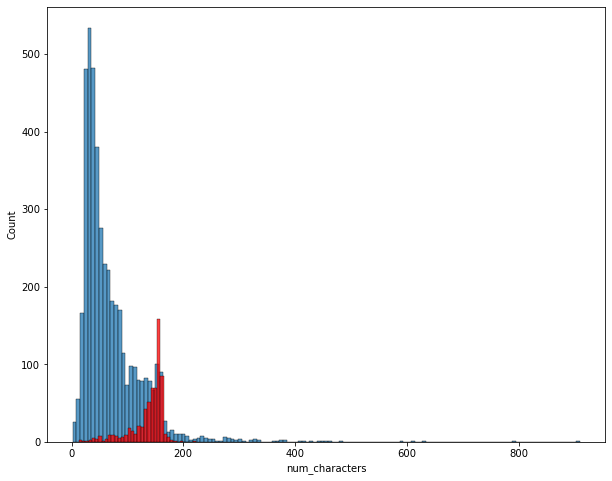

In [24]:
import seaborn as sns

plt.figure(figsize=(10,8))
sns.histplot(final_df[final_df['Type'] == 0]['num_characters'])
sns.histplot(final_df[final_df['Type'] == 1]['num_characters'],color='red')
plt.show()

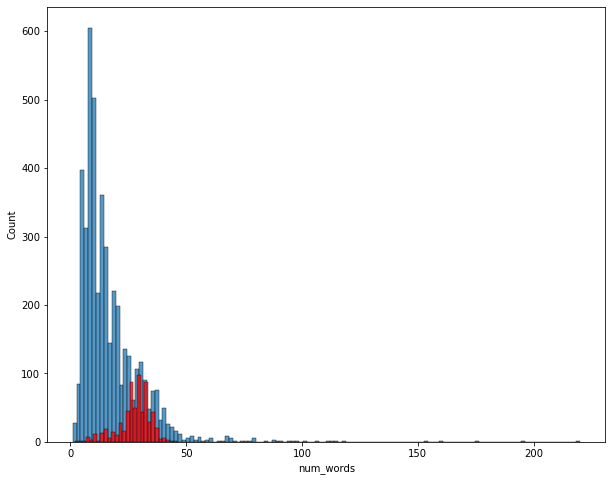

In [25]:
plt.figure(figsize=(10,8))
sns.histplot(final_df[final_df['Type'] == 0]['num_words'])
sns.histplot(final_df[final_df['Type'] == 1]['num_words'],color='red')
plt.show()

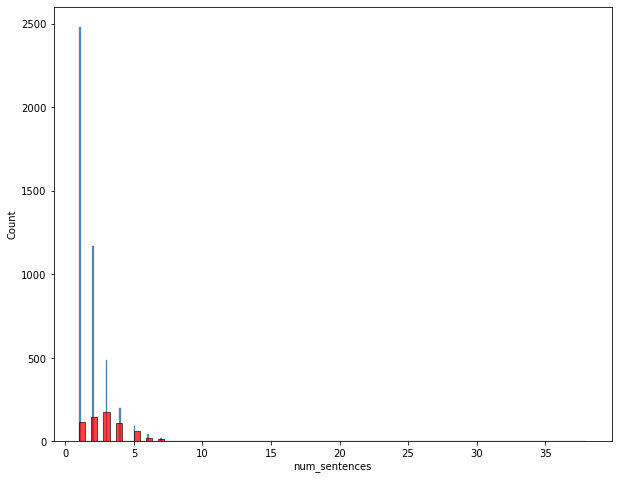

In [26]:
plt.figure(figsize=(10,8))
sns.histplot(final_df[final_df['Type'] == 0]['num_sentences'])
sns.histplot(final_df[final_df['Type'] == 1]['num_sentences'],color='red')
plt.show()

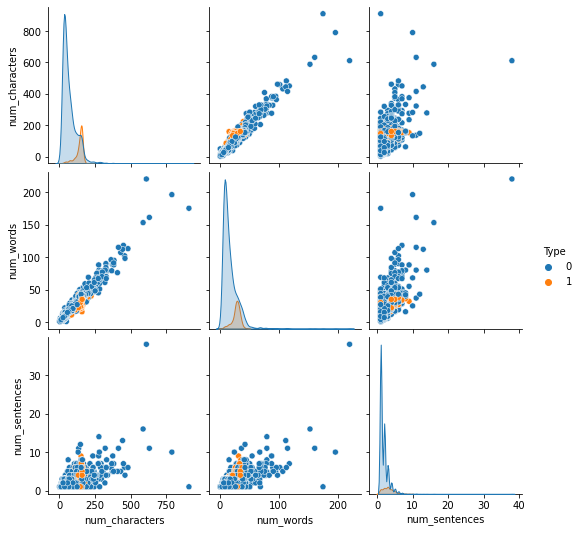

In [27]:
sns.pairplot(final_df,hue='Type')
plt.show()

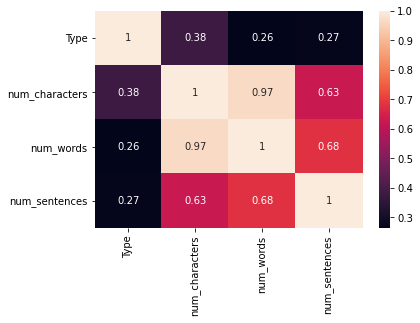

In [28]:
sns.heatmap(final_df.corr(),annot=True)
plt.show()

<AxesSubplot:xlabel='Type', ylabel='num_characters'>

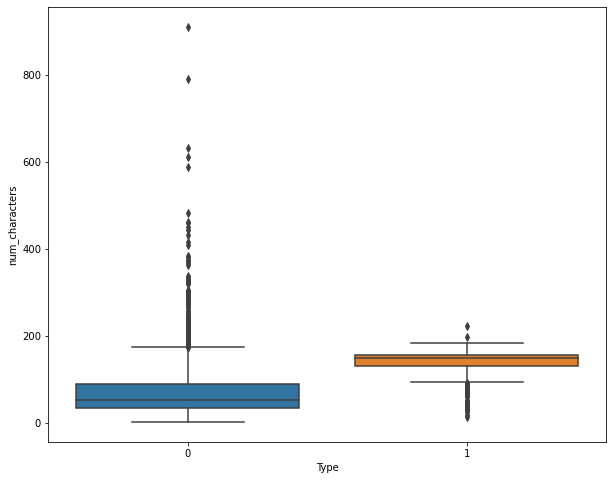

In [29]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Type',y='num_characters',data=final_df)

# 3. Data Preprocessing

    1. Lowercase
    2. Tokenization
    3. Removing Special Character
    4. Removing stop words and punctuation
    5. stemming

In [30]:
from nltk.corpus import stopwords
import string
from nltk.stem import PorterStemmer

ps = PorterStemmer()

def text_processing(text):
    text = nltk.word_tokenize(text.lower())
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            stemming = ps.stem(i)
            y.append(stemming)
            
    return " ".join(y)

In [31]:
text_processing('I Loved the YT Lectures on machine Learning What About You! dacing dance danced')

'love yt lectur machin learn dace danc danc'

In [32]:
# def new_func(text):
#     y = []
#     for i in text.split():
#         x = ""
#         for j in i:
#             if j not in string.punctuation:
#                 x = x + j
#         y.append(x)
#     return " ".join(y)

# new_func('hello Hi%%tes%h How%%% ar**..e You')

In [33]:
final_df['transformed_text'] = final_df['SMS'].apply(text_processing)

In [34]:
final_df.head()

,Type,SMS,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [35]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

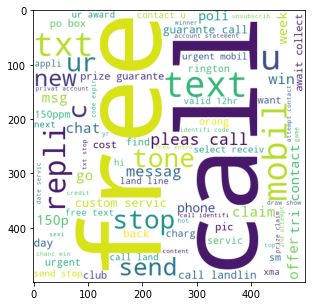

In [36]:
## Spam Word Cloud
spam_wc = wc.generate(final_df[final_df['Type'] == 1]['transformed_text'].str.cat(sep = " "))
plt.figure(figsize=(8,5))
plt.imshow(spam_wc)
plt.show()

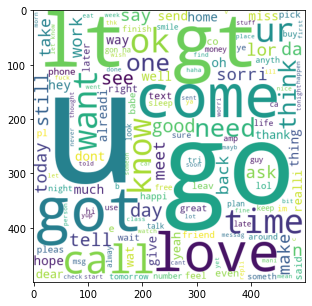

In [37]:
## Ham Word Cloud
ham_wc = wc.generate(final_df[final_df['Type'] == 0]['transformed_text'].str.cat(sep = " "))
plt.figure(figsize=(8,5))
plt.imshow(ham_wc)
plt.show()

In [38]:
## Converting Spam Messages to List of Words
x = final_df[final_df['Type'] == 1]['transformed_text'].str.cat(sep= " ")
spam_msg_word_list = x.split()
len(spam_msg_word_list)

9941

In [39]:
## Counting Top 30 Words from spam messages
from collections import Counter
spam_top_30words = pd.DataFrame(Counter(spam_msg_word_list).most_common(30))

C:\Users\Shivshakti Media\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


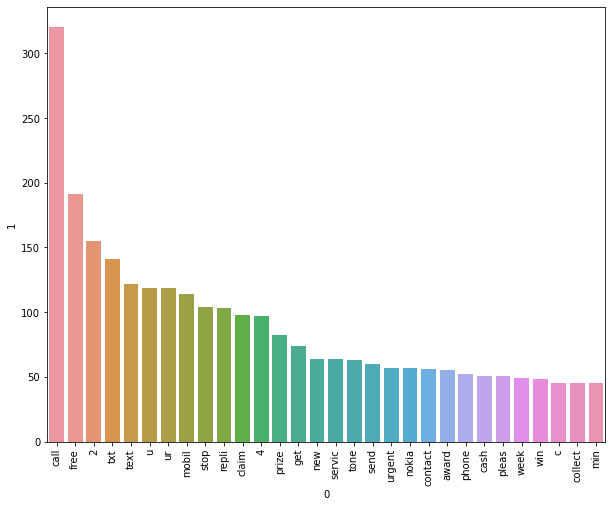

In [40]:
## Visualising it on the Bar Plot
plt.figure(figsize=(10,8))
sns.barplot(spam_top_30words[0],spam_top_30words[1])
plt.xticks(rotation='vertical')
plt.show()

In [41]:
## List of the Total Ham Words

ham_msg_list = final_df[final_df['Type'] == 0]['transformed_text'].tolist()
ham_msg_word_list = []

for i in ham_msg_list:
    for j in i.split():
        ham_msg_word_list.append(j)

In [42]:
## Converting Most Comman 30 WOrds to DataFrame
ham_top_30words = pd.DataFrame(Counter(ham_msg_word_list).most_common(30))
ham_top_30words.head()

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287


C:\Users\Shivshakti Media\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


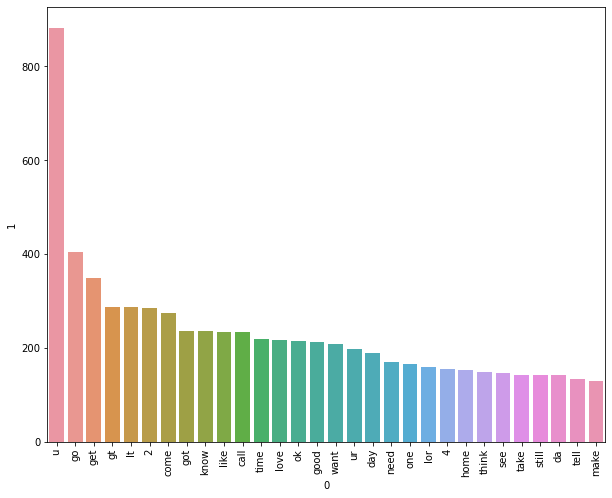

In [43]:
## making barplot og ham words
plt.figure(figsize=(10,8))
sns.barplot(ham_top_30words[0],ham_top_30words[1])
plt.xticks(rotation = 'vertical')
plt.show()

#  Model Building

In [466]:
## First of all We have to Convert Our SMS text to Vectors Using Bag of Words Technique

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tf = TfidfVectorizer(max_features=3000)

In [467]:
X = tf.fit_transform(final_df['transformed_text']).toarray()
# X = np.hstack((X,final_df['num_characters'].values.reshape(-1,1)))
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [468]:
y = np.array(final_df['Type'])
y

array([0, 0, 1, ..., 0, 0, 0])

In [469]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=48,test_size=0.30)

In [470]:
X_train.shape

(3618, 3000)

In [370]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,f1_score

gnb = GaussianNB()
bnb = BernoulliNB()
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50,random_state=2,max_depth=60)

In [371]:
def model_scoring(model,X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    acc_score = accuracy_score(y_test,pred)
    con_matrix = confusion_matrix(y_test,pred)
    pre_score = precision_score(y_test,pred)
    f1score = f1_score(y_test,pred)
    return acc_score,con_matrix,pre_score,f1score
    

In [52]:
model_scoring(gnb,X_train,X_test,y_train,y_test)

(0.8613797549967763,
 array([[1174,  182],
        [  33,  162]], dtype=int64),
 0.47093023255813954,
 0.601113172541744)

In [53]:
model_scoring(bnb,X_train,X_test,y_train,y_test)

(0.9671179883945842,
 array([[1351,    5],
        [  46,  149]], dtype=int64),
 0.9675324675324676,
 0.8538681948424067)

In [54]:
model_scoring(mnb,X_train,X_test,y_train,y_test)

(0.9555125725338491,
 array([[1356,    0],
        [  69,  126]], dtype=int64),
 1.0,
 0.7850467289719627)

In [291]:
model_scoring(etc,X_train,X_test,y_train,y_test)

(0.9626047711154094,
 array([[1355,    1],
        [  57,  138]], dtype=int64),
 0.9928057553956835,
 0.8263473053892216)

In [55]:
from sklearn.model_selection import StratifiedKFold
sss = StratifiedKFold(n_splits=8)

In [97]:
mnb_pre = []
gnb_pre = []
bnb_pre = []
mnb_acc = []
gnb_acc = []
bnb_acc = []
etc_acc = []
etc_pre = []


for train_index,test_index in sss.split(X,y):
    X_trai,X_tes = X[train_index],X[test_index]
    y_trai,y_tes = y[train_index],y[test_index]
    
    acc1,con1,pre1,f1 = model_scoring(mnb,X_trai,X_tes,y_trai,y_tes)
    acc2,con2,pre2,f1 = model_scoring(gnb,X_trai,X_tes,y_trai,y_tes)
    acc3,con3,pre3,f1 = model_scoring(bnb,X_trai,X_tes,y_trai,y_tes)
    acc4,con4,pre4,f1 = model_scoring(etc,X_train,X_test,y_train,y_test)
    
    mnb_pre.append(pre1)
    gnb_pre.append(pre2)
    bnb_pre.append(pre3)
    etc_pre.append(pre4)
    
    mnb_acc.append(acc1)
    gnb_acc.append(acc2)
    bnb_acc.append(acc3)
    etc_acc.append(acc4)

In [98]:
print(mnb_pre)
print(gnb_pre)
print(bnb_pre)
print(etc_pre)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.48344370860927155, 0.47651006711409394, 0.44029850746268656, 0.4788732394366197, 0.4791666666666667, 0.4863013698630137, 0.5074626865671642, 0.4605263157894737]
[0.961038961038961, 0.9846153846153847, 0.9375, 0.9285714285714286, 0.9571428571428572, 0.9696969696969697, 0.9682539682539683, 1.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [99]:
print(mnb_acc)
print(gnb_acc)
print(bnb_acc)
print(etc_acc)

[0.9768160741885626, 0.9690402476780186, 0.9535603715170279, 0.9643962848297214, 0.9659442724458205, 0.9628482972136223, 0.9566563467492261, 0.9643962848297214]
[0.865533230293663, 0.8637770897832817, 0.8498452012383901, 0.8653250773993808, 0.8637770897832817, 0.8668730650154799, 0.8761609907120743, 0.8544891640866873]
[0.9829984544049459, 0.9721362229102167, 0.9613003095975232, 0.9674922600619195, 0.9721362229102167, 0.9690402476780186, 0.9643962848297214, 0.9736842105263158]
[0.9761444229529336, 0.9761444229529336, 0.9761444229529336, 0.9761444229529336, 0.9761444229529336, 0.9761444229529336, 0.9761444229529336, 0.9761444229529336]


# Now we are Going to Check some other Model Also

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier

In [361]:
lg = LogisticRegression(penalty='l1',solver='liblinear')
sv = SVC(kernel='sigmoid',gamma=1.0)
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
knn = KNeighborsClassifier()
rfc = RandomForestClassifier(n_estimators=50,random_state=2)
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)
abc = AdaBoostClassifier(n_estimators=50,random_state=2)
bg = BaggingClassifier(n_estimators=50,random_state=2)
gbc = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [61]:
clfs= {
    'LR':lg,
    'SVM':sv,
    'MNB':mnb,
    'DTC':dtc,
    'KNN':knn,
    'RFC':rfc,
    'ETC':etc,
    'ABC':abc,
    'BG':bg,
    'GBC':gbc,
    'XGB':xgb
}
clfs

{'LR': LogisticRegression(penalty='l1', solver='liblinear'),
 'SVM': SVC(gamma=1.0, kernel='sigmoid'),
 'MNB': MultinomialNB(),
 'DTC': DecisionTreeClassifier(max_depth=5),
 'KNN': KNeighborsClassifier(),
 'RFC': RandomForestClassifier(n_estimators=50, random_state=2),
 'ETC': ExtraTreesClassifier(n_estimators=50, random_state=2),
 'ABC': AdaBoostClassifier(random_state=2),
 'BG': BaggingClassifier(n_estimators=50, random_state=2),
 'GBC': GradientBoostingClassifier(n_estimators=50, random_state=2),
 'XGB': XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
               colsample_bynode=None, colsample_bytree=None,
               enable_categorical=False, gamma=None, gpu_id=None,
               importance_type=None, interaction_constraints=None,
               learning_rate=None, max_delta_step=None, max_depth=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=50, n_jobs=None, num_parallel_tree=None,
     

In [62]:
def score_prediction(model,X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train)
    pr = model.predict(X_test)
    acc_score = accuracy_score(y_test,pr)
    pre_score = precision_score(y_test,pr)
    
    return acc_score,pre_score

In [87]:
# print(score_prediction(mnb,X_train,X_test,y_train,y_test))
# print(score_prediction(lg,X_train,X_test,y_train,y_test))
# print(score_prediction(sv,X_train,X_test,y_train,y_test))
# print(score_prediction(dtc,X_train,X_test,y_train,y_test))
# print(score_prediction(knn,X_train,X_test,y_train,y_test))
# print(score_prediction(rfc,X_train,X_test,y_train,y_test))
# print(score_prediction(etc,X_train,X_test,y_train,y_test))
# print(score_prediction(abc,X_train,X_test,y_train,y_test))
# print(score_prediction(bg,X_train,X_test,y_train,y_test))
# print(score_prediction(gbc,X_train,X_test,y_train,y_test))
# print(score_prediction(xgb,X_train,X_test,y_train,y_test))

(0.9748549323017408, 0.9936708860759493)


In [69]:
acc_score = []
pre_score = []

for name,clf in clfs.items():
    current_score,current_precision = score_prediction(clf,X_train,X_test,y_train,y_test)
   
    acc_score.append(current_score)
    pre_score.append(current_precision)

C:\Users\Shivshakti Media\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:56:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [79]:
acc_score

[0.9490651192778853,
 0.9671179883945842,
 0.9555125725338491,
 0.9323017408123792,
 0.9019987105093488,
 0.9709864603481625,
 0.9761444229529336,
 0.9593810444874274,
 0.9600257898130239,
 0.9516441005802708,
 0.9690522243713733]

In [78]:
pre_score

[0.9084507042253521,
 0.95,
 1.0,
 0.8,
 1.0,
 0.993421052631579,
 1.0,
 0.875,
 0.8674033149171271,
 0.9347826086956522,
 0.9248554913294798]

In [163]:
# mnb_df = pd.DataFrame({'Model':clfs.keys(),'Accuracy':acc_score,'precision':pre_score}).sort_values('Accuracy',ascending=False).sort_values('precision',ascending=False)
mnb_df

,Model,Accuracy,precision
6,ETC,0.976144,1.000000
2,MNB,0.955513,1.000000
4,KNN,0.901999,1.000000
5,RFC,0.970986,0.993421
1,SVM,0.967118,0.950000
9,GBC,0.951644,0.934783
10,XGB,0.969052,0.924855
0,LR,0.949065,0.908451
7,ABC,0.959381,0.875000
8,BG,0.960026,0.867403


In [313]:
# mnb,etc are the best Models For Our Data and Now we will try to Improve Performance of them
from sklearn.ensemble import VotingClassifier
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)

In [314]:
score_prediction(mnb,X_train,X_test,y_train,y_test)

(0.9600257898130239, 1.0)

In [232]:
score_prediction(etc,X_train,X_test,y_train,y_test)

(0.973565441650548, 0.98125)

In [251]:
voting = VotingClassifier(estimators=[('mnb',mnb),('etc',etc),('rfc',rfc)],voting='soft')

In [433]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('mnb', MultinomialNB()),
                             ('etc',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2)),
                             ('rfc',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2))],
                 voting='soft')

In [434]:
y_pred = voting.predict(X_test)

In [437]:
from sklearn.metrics import confusion_matrix
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.970341715022566
1.0


In [256]:
voting_pre = []
voting_acc = []

for train_index,test_index in sss.split(X,y):
    X_trai,X_tes = X[train_index],X[test_index]
    y_trai,y_tes = y[train_index],y[test_index]
    
    acc,con,pre,f = model_scoring(voting,X_trai,X_tes,y_trai,y_tes)
    
    voting_pre.append(pre)
    voting_acc.append(acc)
   

In [257]:
print(voting_pre)
print(voting_acc)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.9860896445131375, 0.9752321981424149, 0.9674922600619195, 0.9767801857585139, 0.9767801857585139, 0.9628482972136223, 0.9659442724458205, 0.9736842105263158]


In [305]:
# from sklearn.model_selection import RandomizedSearchCV
# #Randomized Search CV

# # Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# # Number of features to consider at every split
# criterion = ['gini', 'entropy']
# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# # max_depth.append(None)
# # Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10, 15,100,200]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1,2,5,10]

In [306]:
# random_grid = {'n_estimators': n_estimators,
#                'criterion': criterion,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf}

In [307]:
# etc = ExtraTreesClassifier()

In [308]:
# rf_random = RandomizedSearchCV(estimator = etc, param_distributions = random_grid,n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [322]:
import pickle

pickle.dump(tf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [471]:
mnb.fit(X_train,y_train)
pred = mnb.predict(X_test)
print(precision_score(y_test,pred))
print(accuracy_score(y_test,pred))

0.9933774834437086
0.970341715022566


In [374]:
etc.fit(X_train,y_train)

ExtraTreesClassifier(max_depth=60, n_estimators=50, random_state=2)

In [375]:
etc_pred = etc.predict(X_test)
precision_score(y_test,etc_pred)

1.0

In [346]:
# import marshal
# code_string = marshal.dumps(text_processing.__code__)
# pickle.dump(code_string,open('text_processing.pkl','wb'))

In [349]:
mnb.predict(X_test)
pickle.dump(mnb,open('model.pkl','wb'))

In [457]:
text = "You've Won! Winning an unexpected prize sounds great in theory"

tft = text_processing(text)

vector = tf.transform([tft]).toarray()

In [458]:
mnb.predict(vector)

array([0])

In [459]:
etc.predict(vector)

array([0])

In [460]:
voting.predict(vector)

array([0])